In [1]:
# This code opens a file uploader to allow you to upload your 'kaggle.json' key file.
from google.colab import files
files.upload()  # Upload your kaggle.json or kaggle (1).json file here


Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"collinsonsombi","key":"bd78f752a547012d98b3147071d187ec"}'}

In [2]:
import os
import shutil

# Rename if file is uploaded as 'kaggle (1).json'
if os.path.exists("kaggle (1).json"):
    shutil.move("kaggle (1).json", "kaggle.json")

# Create the .kaggle directory
os.makedirs("/root/.kaggle", exist_ok=True)

# Move the renamed file to where Kaggle API expects it
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")

# Set the correct permission
os.chmod("/root/.kaggle/kaggle.json", 600)


In [1]:
# Install the Kaggle Python package (quiet mode)
!pip install -q kaggle


In [2]:
# Download the breast cancer dataset from Kaggle
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data


Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 128MB/s]


In [3]:
import zipfile

# Extract the downloaded ZIP into a new folder named 'data'
with zipfile.ZipFile("breast-cancer-wisconsin-data.zip", 'r') as zip_ref:
    zip_ref.extractall("data")


In [4]:
import pandas as pd

# Read the CSV file from the extracted folder
df = pd.read_csv("data/data.csv")

# Show the first 5 rows to inspect structure
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
# Drop ID and unnamed columns
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

# Convert diagnosis: M = 1 (malignant), B = 0 (benign)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Create a simple issue priority column:
# High if malignant and radius_mean > 15
# Medium if benign but radius_mean > 15
# Else Low
def assign_priority(row):
    if row['diagnosis'] == 1 and row['radius_mean'] > 15:
        return 'High'
    elif row['radius_mean'] > 15:
        return 'Medium'
    else:
        return 'Low'

df['priority'] = df.apply(assign_priority, axis=1)

# Show sample rows with new priority column
df[['diagnosis', 'radius_mean', 'priority']].head(10)


,diagnosis,radius_mean,priority
0,1,17.99,High
1,1,20.57,High
2,1,19.69,High
3,1,11.42,Low
4,1,20.29,High
5,1,12.45,Low
6,1,18.25,High
7,1,13.71,Low
8,1,13.00,Low
9,1,12.46,Low


In [6]:
from sklearn.model_selection import train_test_split

# Use all columns except 'priority' as input
X = df.drop(columns=['priority'])

# Target label
y = df['priority']

# Split into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check class distribution
y.value_counts()


,count
priority,
Low,396
High,161
Medium,12


In [7]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [8]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred = rf.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# F1-score and more
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9912280701754386

Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00        36
         Low       0.99      1.00      0.99        77
      Medium       0.00      0.00      0.00         1

    accuracy                           0.99       114
   macro avg       0.66      0.67      0.66       114
weighted avg       0.98      0.99      0.99       114



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


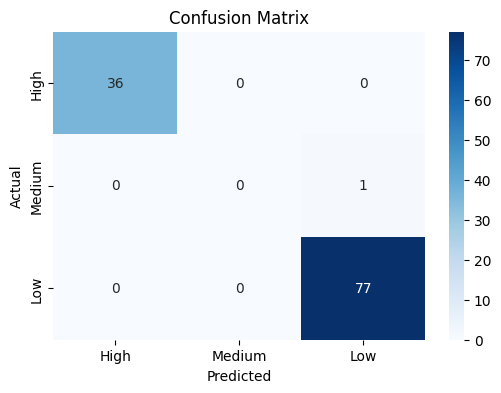

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['High', 'Medium', 'Low'])

# Plot
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['High', 'Medium', 'Low'],
            yticklabels=['High', 'Medium', 'Low'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


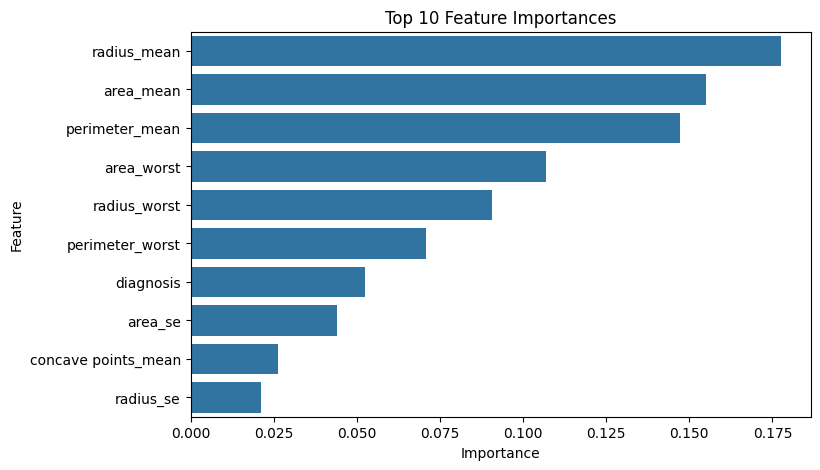

In [10]:
# Get feature importances
importances = rf.feature_importances_
features = X.columns

# Plot top 10 features
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
top_features = feature_df.sort_values(by='Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title('Top 10 Feature Importances')
plt.show()


In [11]:
import joblib

# Save the model to disk
joblib.dump(rf, 'random_forest_priority_model.pkl')

# To load it later:
# model = joblib.load('random_forest_priority_model.pkl')


['random_forest_priority_model.pkl']